In [73]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10, 10]

In [120]:
def circle_mean(arr: np.ndarray, x_center: int, y_center: int, r: float, sections=(0, 1, 2, 3, 4, 5, 6, 7)) -> float:
    # Round r
    r = int(r)
    
    # Count the pole pixels first
    total = 0
    pixel_count = 0
    
    if 0 in sections or 7 in sections:
        total += arr[y_center, x_center + r]
        pixel_count += 1
    
    if 1 in sections or 2 in sections:
        total += arr[y_center + r, x_center]
        pixel_count += 1
    
    if 3 in sections or 4 in sections:
        total += arr[y_center, x_center - r]
        pixel_count += 1
    
    if 5 in sections or 6 in sections:
        total += arr[y_center - r, x_center]
        pixel_count += 1
    
    x = 0
    y = r
    
    # Weird number, explained at https://www.geeksforgeeks.org/mid-point-circle-drawing-algorithm/ 
    p = 1 - r
    
    while y > x:
        x += 1
        
        if p <= 0:
            p = p + 2*x + 1
        else:
            y -= 1
            p = p + 2*x - 2*y +1
        
        if y < x:
            break
        
        if 0 in sections:
            total += arr[y_center - x, x_center + y]
        
        if 1 in sections:
            total += arr[y_center - y, x_center + x]
            
        if 2 in sections: 
            total += arr[y_center - y, x_center - x]
        
        if 3 in sections:
            total += arr[y_center - x, x_center - y]
        
        if 4 in sections:
            total += arr[y_center + x, x_center - y]
        
        if 5 in sections:
            total += arr[y_center + y, x_center + x]
        
        if 6 in sections:
            total += arr[y_center + y, x_center - x]
        
        if 7 in sections:
            total += arr[y_center + x, x_center + y]
        
        pixel_count += len(sections)
    
    return total / pixel_count

18
18


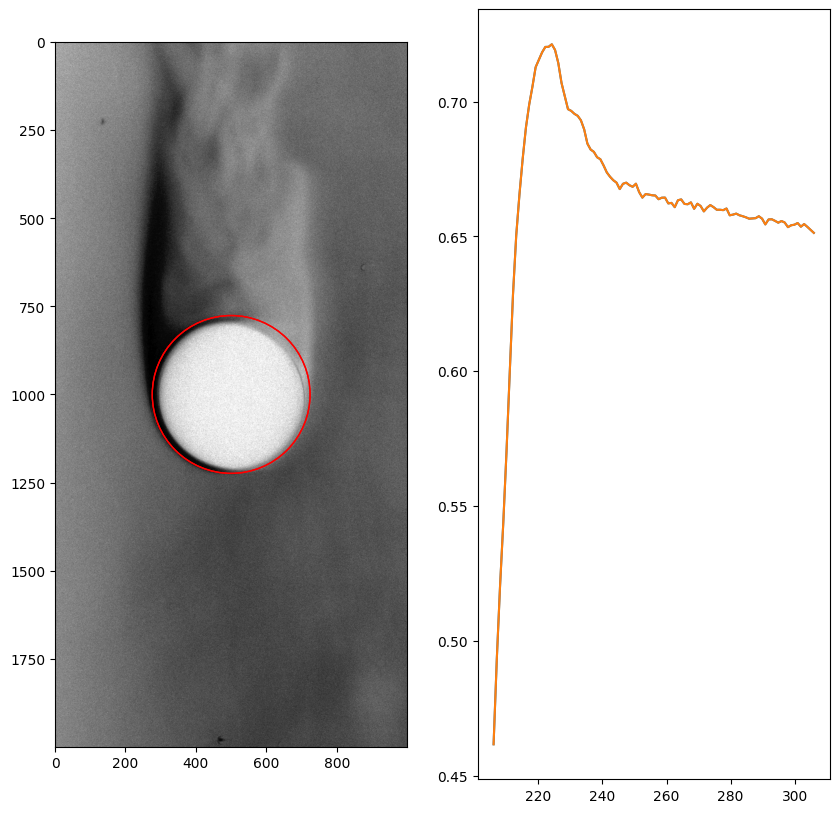

In [128]:
config = np.genfromtxt('kugelmitte.txt', dtype=None, delimiter=' ', skip_header=1, encoding='utf-8')
image_input_folder = 'originalbilder'
possible_radii = 100
clip_width = 500
clip_height = 1000

for i, sample in enumerate(config):
    filename = sample[0]
    image = plt.imread(f'{image_input_folder}/{filename}')
    greyscale = 0.299 * image[:,:,0] + 0.587 * image[:,:,1] + 0.114 * image[:,:,2]
    
    x_center = sample[1]
    y_center = sample[2]
    r = sample[3]
    
    out = np.zeros(possible_radii)
    for j, r_j in enumerate(np.linspace(r, r + possible_radii, num=possible_radii)):
        out[j] = circle_mean(greyscale, x_center, y_center, r_j)
    
    schlieren_width = out.argmax()
    
    ax = plt.subplot(1, 2, 1)
    plt.imshow(greyscale[y_center - clip_height:y_center + clip_height, x_center - clip_width:x_center + clip_width], cmap='gray_r')
    ax.add_patch(plt.Circle((clip_width, clip_height), r + schlieren_width, color='red', fill=False))
    
    plt.subplot(1, 2, 2)
    plt.plot(np.linspace(r, r + possible_radii, num=possible_radii), out)
    print(schlieren_width)